# Regresión

En los problemas de **regresión,** la salida es un real $y\in\mathbb{R}$ en lugar de una etiqueta de clase $y\in\{1,\dotsc,C\}$, como ocurre en clasificación. La función de pérdida usual en regresión es la **pérdida cuadrática** o **L2:**
$$\ell_2(y,\hat{y})=(y-\hat{y})^2$$
La diferencia entre observación y predicción, $y-\hat{y}$, recibe el nombre de **residuo.** Llamamos **error cuadrático medio (MSE, mean squared error)** al riesgo empírico con pérdida cuadrática:
$$\operatorname{MSE}(\boldsymbol{\theta})=\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2$$
El modelo probabilístico condicional que suele usarse para capturar la incertidumbre subyacente es la **distribución normal o Gaussiana condicional (a posteriori):**
$$p(y\mid \boldsymbol{x}; \boldsymbol{\theta})%
=\mathcal{N}(y\mid \mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[{-\frac{1}{2\sigma^2}(y-\mu)^2}\right]%
\qquad\text{con}\qquad%
\mu=f(\boldsymbol{x}; \boldsymbol{\theta})$$
Nótese que la función predictora se limita a predecir la media (a posteriori); por simplicidad en este contexto, la varianza $\sigma^2$ se asume fija. Por otro lado, se puede comprobar que la neg-log-verosimilitud es proporcional al MSE:
$$\begin{align*}\operatorname{NLL}(\boldsymbol{\theta})%
&=-\frac{1}{N}\sum_n\log\left[\left(2\pi\sigma^2\right)^{-\frac{1}{2}}%
\exp\left(-\frac{1}{2\sigma^2}(y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\right)\right]\\%
&=\frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\frac{1}{N}\sum_n (y_n-f(\boldsymbol{x}_n; \boldsymbol{\theta}))^2\\%
&=\operatorname{const}+\frac{1}{2\sigma^2}\operatorname{MSE}(\boldsymbol{\theta})
\end{align*}$$
Así pues, el MLE de $\boldsymbol{\theta}$ también minimiza el MSE. En general, la dificultad de un problema de regresión depende en gran medida de la dimensión $D$ de la entrada. Si la entrada es unidimensional, $x\in\mathbb{R}$, hablamos de **regresión simple**; si no, si $\boldsymbol{x}\in\mathbb{R}^D$, $D>1$, hablamos de **regresión múltiple.**

## Regresión lineal

**Regresión lineal simple (1d)** predice la salida esperada mediante una sencilla recta:
$$f(x;\boldsymbol{\theta})=b+wx$$
donde $\boldsymbol{\theta}=(b ,w)$, $w$ es la **pendiente** de la recta y $b$ el **desplazamiento u ordenada en origen.**
El ajuste de ambos parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados.**

**Ejemplo:** regresión lineal simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [-4.35089704  0.53773872]


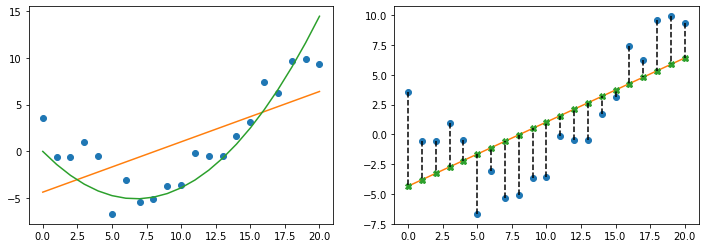

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = w[0] * X + w[1] * np.square(X) 
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

**Regresión lineal múltiple (2d+)** predice la salida esperada mediante una combinación lineal de las entradas:
$$f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+\cdots+w_Dx_D=b+\boldsymbol{w}^t\boldsymbol{x}$$
Como en regresión lineal 1d, el ajuste de parámetros mediante minimización del MSE conduce a una solución de **mínimos cuadrados.**

**Ejemplo:** predicción de temperatura en función de la localización 2d en una sala, $f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2$

In [2]:
import numpy as np
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
print(np.hstack((X, y))[:3, :])

[[21.5    23.     17.8618]
 [24.5    20.     18.2146]
 [19.5    19.     18.0284]]


w =  [1.64141259e+01 1.37458660e-02 3.72170281e-03]


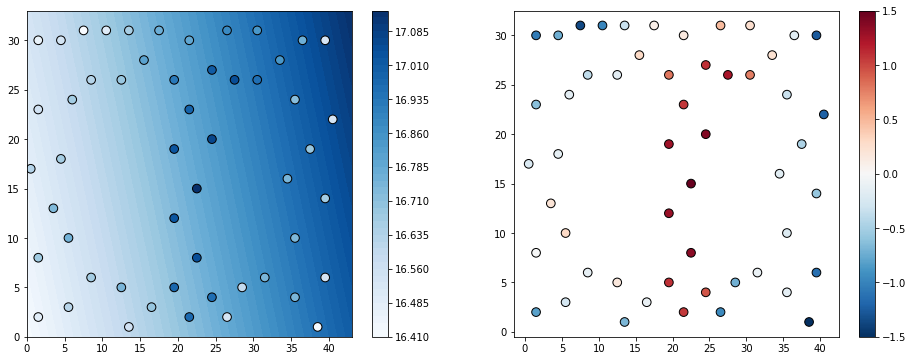

In [3]:
import matplotlib.pyplot as plt
X1 = np.c_[np.ones((N, 1)), X]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
zz = np.apply_along_axis(z, 1, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5)
plt.colorbar(sp, ax=ax);

## Regresión polinómica

**Regresión polinómica simple de grado $G$** predice la salida esperada mediante una combinación lineal de las entradas previamente transformadas con una **función base polinómica de grado $G$:**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(x)%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(x)=(1,x,x^2,\dotsc,x^G)$$
Decimos que $\boldsymbol{\phi}$ hace **extracción o ingeniería de características.** Técnicamente, se trata de un caso particular de regresión lineal múltiple.

**Ejemplo (cont.):** regresión polinómica simple con datos sintéticos
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

w =  [ 1.97649843 -1.46038617  0.09990624]


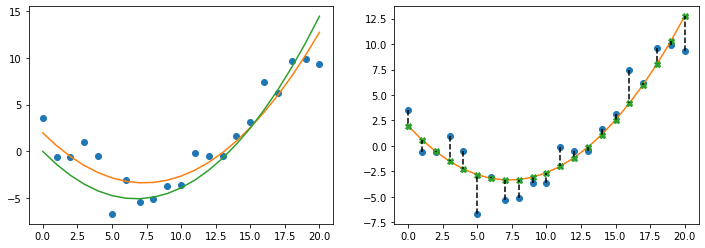

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X = np.linspace(0.0, 20, N)
y_mean = w[0] * X + w[1] * np.square(X) 
y = y_mean + np.random.normal(0, sigma, N)
X1 = np.c_[np.ones((N, 1)), X]
G = 2 # <<< escoge grado
for g in np.arange(2, G+1):
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
w = np.linalg.lstsq(X1, y, rcond=None)[0]; y_pred = X1 @ w
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes[0]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_mean, '-')
ax = axes[1]; ax.plot(X, y, 'o'); ax.plot(X, y_pred, '-'); ax.plot(X, y_pred, 'X');
for x0, y0, y_hat in zip(X, y, y_pred):
    ax.plot([x0, x0], [y0, y_hat], 'k--')

**Regresión polinómica múltiple de grado $G$** generaliza la simple mediante una función base polinómica de grado $G$ **múltiple:**
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{\phi}(\boldsymbol{x})%
\qquad\text{donde}\qquad%
\boldsymbol{\phi}(\boldsymbol{x})=(1,x_1,\dotsc,x_D,x_1^2,x_1x_2,\dotsc,x_D^2,x_1^3,\dotsc,x_D^G)$$
Al igual que regresión polinómica simple de grado $G$, técnicamente se trata de un caso particular de regresión lineal múltiple.

**Ejemplo (cont.):** predicción de temperatura en función de la localización 2d en una sala, $f(\boldsymbol{x};\boldsymbol{\theta})=b+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2$

w =  [ 1.44583001e+01  1.97176089e-01  1.73554412e-01 -4.53576130e-03
 -5.19514810e-03]


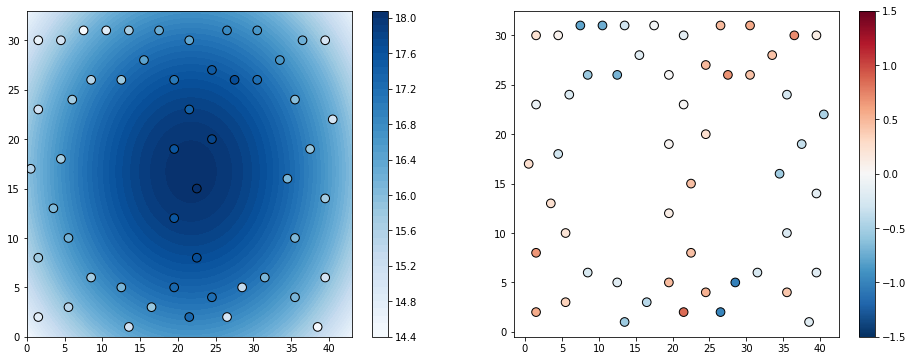

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import requests
from io import BytesIO
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
data = loadmat(BytesIO(requests.get(url).content))
X, y = data["X"], data["y"]; N = X.shape[0]
X1 = np.c_[np.ones((N, 1)), X, np.square(X)]
w = np.linalg.lstsq(X1, y, rcond=None)[0].squeeze()
print("w = ", w); fig, axes = plt.subplots(1, 2, figsize=(16, 6))
xx, yy = np.meshgrid(np.linspace(0, 43, num=100), np.linspace(0, 33, num=100))
z = lambda x: w[0] + np.dot(w[1:], x)
Z = np.c_[xx.ravel(), yy.ravel()]; ZZ = np.c_[Z, np.square(Z)]
zz = np.apply_along_axis(z, 1, ZZ).reshape(xx.shape)
ax = axes[0]; cp = ax.contourf(xx, yy, zz, 50, cmap='Blues'); plt.colorbar(cp, ax=ax)
ax.scatter(*X.T, c=y.reshape(1, -1), cmap='Blues', edgecolors='black', s=75); 
ax = axes[1]; res = y - np.apply_along_axis(z, 1, X1[:, 1:]).reshape(-1, 1) # residuos
sp = ax.scatter(*X.T, c=res, cmap='RdBu_r', edgecolors='black', s=75, vmin=-1.5, vmax=1.5);
plt.colorbar(sp, ax=ax);

## Redes neuronales profundas

Las **redes neuronales profundas (DNNs, deep neural networks)** introducen funciones base más generales, con parámetros propios. En términos generales, una DNN descompone recursivamente la extracción de características, dando lugar a una pila de $L$ funciones o **capas** anidadas:
$$f(\boldsymbol{x};\boldsymbol{\theta})=f_L(f_{L-1}(\cdots f_1(\boldsymbol{x})\cdots))$$
donde la función de la capa $\ell$-ésima se define en términos de un subconjunto de parámetros $\boldsymbol{\theta}_{\ell}$,
$$f_{\ell}(\boldsymbol{x})=f_{\ell}(\boldsymbol{x};\boldsymbol{\theta}_{\ell})$$
La capa final es lineal, de la forma
$$f_L(\boldsymbol{x})=\boldsymbol{w}^t\,f_{1:L-1}(\boldsymbol{x})$$
donde $f_{1:L-1}(\boldsymbol{x})$ es el extractor de características aprendido. Ésta es, en esencia, la idea clave que da lugar a las DNNs, entre las que se encuentran variantes muy populares como las **redes neuronales convolucionales (CNNs)** para imágenes y las **redes neuronales recurrentes (RNNs)** para secuencias.